In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
X_train = pd.read_csv("Logistic_X_Train.csv")
Y_train = pd.read_csv("Logistic_Y_Train.csv")
X_test = pd.read_csv("Logistic_X_Test.csv")

In [62]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values

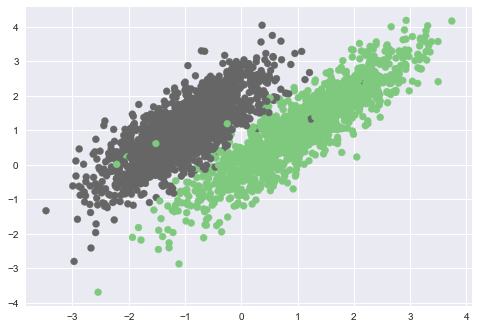

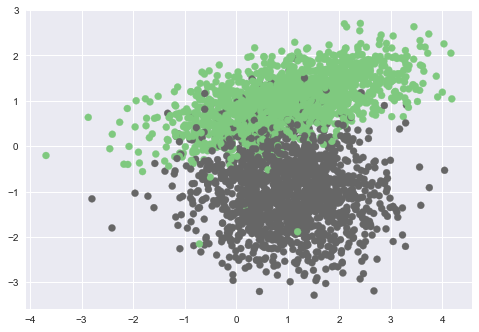

In [63]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()
plt.scatter(X_train[:,1],X_train[:,2],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [64]:
# Data Normalisation

x_mean = X_train.mean(axis=0) # axis 0 means column wise
x_mean # Two values

# If we use axis=1, then we will get 1000 values

array([0.00745338, 0.99928635, 0.02948714])

In [65]:
x_std = X_train.std(axis=0)

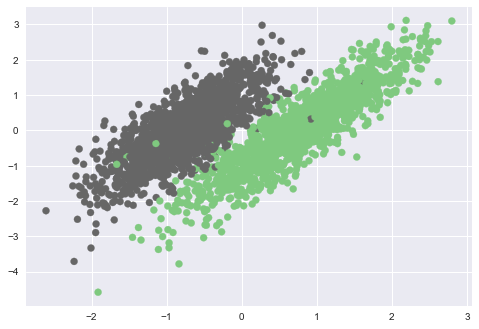

In [66]:
# Apply the transformation
X_train = (X_train-x_mean)/x_std

# Apply the same Transformation for test data
# No new mean is calculates, mean of training is used
x_test_mean = X_test.mean(axis=0)
x_test_std = X_test.std(axis=0)
X_test = (X_test-x_test_mean)/x_test_std

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show() # Almost same but data is shifted to give center at 0

In [67]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x)) # Gives output between 0 to 1

def hypothesis(X,theta):
    """
    X - Entire array(m,n+1)
    theta - np.array(n+1,1)
    """
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    """
    params:
    X - (m,n+1)
    y - (m,1)
    theta - (n+1,1)
    
    return:
        scale_value = loss
    """
    hi = hypothesis(X,theta)
    e = -1*np.mean((y*np.log(hi) + ((1-y)*np.log(1-hi))))
    
    return e
    

In [68]:
def gradient(X,y,theta):
    """
    params:
    X - (m,n+1)
    y - (m,1)
    theta - (n+1,1)
    
    return:
        gradient_vector - (n+1,1)
    """
    hi = hypothesis(X,theta)
    grad = -np.dot(X.T,(y-hi))
    
    m = X.shape[0]
    return grad/m
    
def gradient_descent(X,y,lr=0.1,max_itr=500):
    n = X.shape[1]
    theta = np.zeros((n,1))
    
    error_list = []
    for i in range(max_itr):
        err = error(X,y,theta)
        error_list.append(err)
        
        grad = gradient(X,y,theta)
        
        # update
        theta = theta - lr*grad
    return (theta,error_list)

In [69]:
ones = np.ones((X_train.shape[0],1))
X_new_train = np.hstack((ones,X_train))
print(X_new_train.shape)
print(X_new_train)
Y_train = Y_train.reshape((-1,1))

(3000, 4)
[[ 1.         -0.93471307 -0.24439694 -0.46140414]
 [ 1.         -0.7823013  -0.19327286 -1.08586573]
 [ 1.         -0.46707053  0.56681072 -1.17534766]
 ...
 [ 1.          0.06059095  0.62470809 -1.83827342]
 [ 1.          1.13777964 -0.13681202  1.22033571]
 [ 1.         -0.74013008 -0.42526137 -1.29728616]]


In [70]:
theta,error_list = gradient_descent(X_new_train,Y_train)

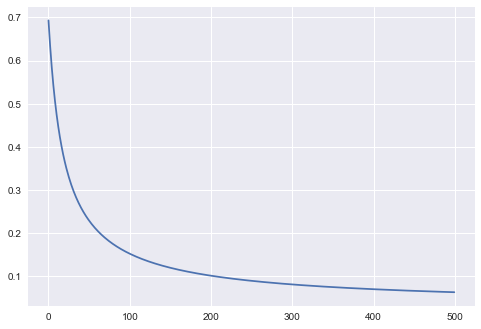

In [71]:
plt.style.use("seaborn")
plt.plot(error_list)
plt.show()

In [73]:
theta

array([[-0.34767648],
       [-2.54073799],
       [ 1.38266256],
       [-2.30256859]])

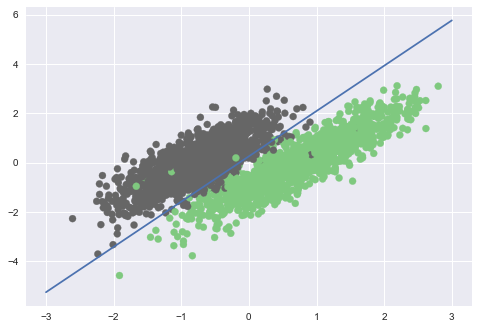

In [72]:
x1 = np.arange(-3,4)

x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1,1)),cmap=plt.cm.Accent)
plt.plot(x1,x2)
plt.show()